The solutions manual has some solutions. Tomoki also has solutions. I have tried to solve as many from the rest as possible.

In [21]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Exercise 8.2.1. Tomoki has solution to this problem. 
# I am just plotting the power function as a function of the parameter.

tlist = [i/1000 for i in range(251)]
pwrlist = [(1+9*t)*(1-t)**9 for t in tlist]

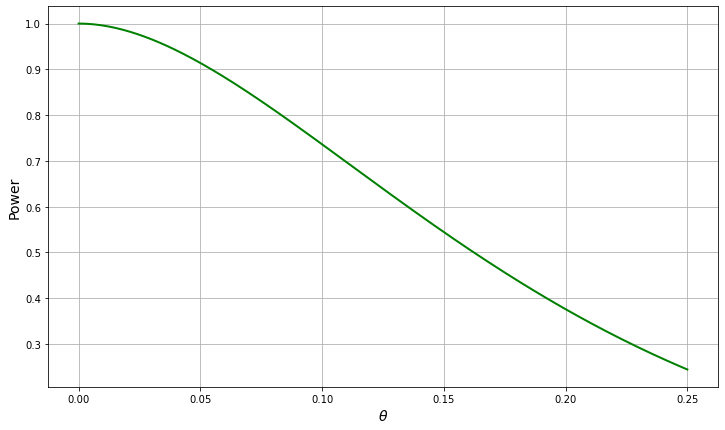

In [23]:
plt.figure(figsize = (12,7))

plt.plot(tlist,pwrlist,linewidth=2,color='g')
plt.ylabel('Power',fontsize=14)
plt.xlabel('$\\theta$',fontsize=14)
plt.grid()
plt.show()

In [24]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [25]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

#### Exercise 8.2.2. 

Let $X$ have a pdf of the form $f(x;\theta) = 1/\theta,$ $0 < x < \theta,$ zero elsewhere. Let
$Y_1 < Y_2 < Y_3 < Y_4$ denote the order statistics of a random sample of size $4$ from
this distribution. Let the observed value of $Y_4$ be $y_4$. We reject $H_0 : \theta = 1$ and
accept $H_1:\theta \neq 1$ if either $y_4 \leq 1$ or $y_4 > 1$. Find the power function $\gamma(\theta),0<\theta,$
of the test.

#### Solution:

Solutions manual has a solution where they say power is $1/(2\theta)^4$ if $\theta < 1$. So if $\theta = 0.25$, then power is $16$ $\require{enclose} {\scriptstyle \enclose{circle}{\kern .06em \ddot\smallsmile \kern .06em}}$

I think the correct answer is

$$
\begin{align}
\gamma(\theta) &= 1, & 0 \leq \theta \leq \frac{1}{2},\\
&= \left( \frac{1}{2\theta} \right)^4, & \frac{1}{2} < \theta \leq 1,\\
&= 1 - \left( \frac{15}{16\theta^4} \right), & 1 < \theta.
\end{align}
$$

In [26]:
tlist = [i/1000 for i in range(2551)]
pwrlist = []
for teta in tlist:
    if(teta <= 0.5):
        pwrlist.append(1)
    elif((0.5 < teta)&(teta <= 1)):
        pwrlist.append(1/(16*teta**4))
    else:
        x=16*(teta**4)
        pwrlist.append(1-15/x)

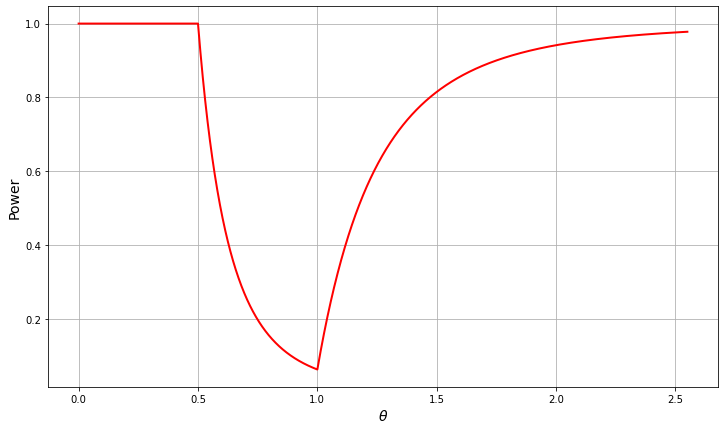

In [27]:
plt.figure(figsize = (12,7))

plt.plot(tlist,pwrlist,linewidth=2,color='r')
plt.ylabel('Power',fontsize=14)
plt.xlabel('$\\theta$',fontsize=14)
plt.grid()
plt.show()

So the power is lowest at $\theta = 1$.

#### Exercise 8.2.4.
Consider the distributions $N(\mu_1,400)$ and $N(\mu_2,225).$ Let $\theta = \mu_1 −\mu_2.$ Let $\overline{x}$ and $\overline{y}$ denote the observed means of two independent random samples, each of size $n$, from these two distributions. We reject $H_0 : \theta = 0$ and accept $H_1 : \theta > 0$ if and only if $\overline{x}−\overline{y} \geq c.$ If $\gamma(\theta)$ is the power function of this test, find $n$ and $c$ so that $\gamma(0) = 0.05$ and $\gamma(10) = 0.90,$ approximately.

#### Solution:
Let $Z \triangleq \overline{X}-\overline{Y}$. Then $Z \sim N(\theta,625/n)$ so that $$\gamma(\theta) = P(Z \geq c) = 1-\Phi\left( \frac{\sqrt{n}(c-\theta)}{25} \right),$$
where $\Phi()$ is the standard normal cdf. Given that $\gamma(0)=0.05$ and $\gamma(10)=0.9$, we can derive $n$ and $c$ to be

$$
\begin{align}
c &= \frac{10\Phi^{-1}(0.95)}{\Phi^{-1}(0.95)-\Phi^{-1}(0.1)} \\
n &= \left[ \frac{25}{c} \Phi^{-1}(0.95) \right]^2.
\end{align}
$$

In [28]:
m1 = invert_norm(0.95)
m2 = invert_norm(0.1)
c=10*m1/(m1-m2)
n=(25/c*m1)**2
print(c,n)

5.620731007873195 53.52689782739617


We should round $n$ to the next higher integer so that $n=54$, so that $c \approx 5.6.$

#### Answer from the back of the book
**8.2.4** About $54$ ; $5.6.$

#### Exercise 8.2.5. 
Consider Example $8.2.2.$ Show that $L(\theta)$ has a monotone likelihood ratio in the statistic $\sum_{i=1}^n X_i^2.$ Use this to determine the UMP test for $H_0 : \theta = \theta',$ where $\theta'$ is a fixed positive number, versus $H_1 : \theta < \theta'.$

#### Solution:

I will use $\theta_1$ for $\theta'$ and $\theta_2$ for $\theta''.$

The likelihood ratio is given by
$$
\frac{L(\theta_1,\pmb{x})}{L(\theta_2,\pmb{x})} = \left(\frac{\theta_2}{\theta_1}\right)^{n/2}\exp{\left[ \frac{\theta_1-\theta_2}{2\theta_1\theta_2} \sum_{i=1}^nx_i^2 \right]}
$$
where $\pmb{x'} = (x_1,\cdots,x_n)$ and each $X_i \sim N(0,\theta).$ This ratio is a function of the statistic $Y=u(\pmb{X}) = \sum_{i=1}^n X_i^2$ where again, the random vector $\pmb{X'} = (X_1,\cdots,X_n).$ The equation above can be written in terms of $y$ ($y$ is the realization of $Y$) as 

$$
\begin{align}
\frac{L(\theta_1,\pmb{x})}{L(\theta_2,\pmb{x})} & \triangleq g(y) \\
&= \left(\frac{\theta_2}{\theta_1}\right)^{n/2}\exp{\left[ \frac{\theta_1-\theta_2}{2\theta_1\theta_2} y \right].}
\end{align}
$$

If $\theta_1 < \theta_2$ (as hypothesised in definition $8.8.2$), the exponential term decreases with $y$  monotonically. Hence the likelihood ratio is monotone in $Y$.

Now the null hypothesis is $\theta = \theta_1$ and the alternative is $\theta < \theta_1$. Let $\theta_2 < \theta_1.$ Then $g(y)$ monotonically increases with $y$. Neyman-Pearson test requires us to have $g(Y) \leq k$ if and only if $\pmb{X} \in C$ where $C$ is the best critical region of size $\alpha$. That is equivalent to $Y \leq g^{-1}(k) \triangleq c_Y$ as $g$ is now monotonically increasing with $Y$. So we have the UMP test as

$$
y \leq c_Y \triangleq \frac{2\theta_1\theta_2}{\theta_1-\theta_2} \log{k}.
$$

BTW the next exercise is related to this, and solutions manual as well as Tomoki have solutions for that problem which required them to have solution for this one as well. Their answers match with the above.

#### Exercise 8.2.8. 
Let $X_1, X_2, \dots , X_n$ denote a random sample from a normal distribution $N (\theta, 16).$ Find the sample size $n$ and a uniformly most powerful test of $H_0 : \theta = 25$ against $H_1 : \theta < 25$ with power function $\gamma(\theta)$ so that approximately $\gamma(25) = 0.10$ and $\gamma(23) = 0.90.$

#### Solution:

Situation is very similar to that in example $8.2.3$ of the text where they have clearly explained that $y = \sum_{i=1}^n x_i \leq c_Y$ for the left sided alternative $\theta < 25$. Using reasoning similar to exercise $8.2.4$, we can derive

$$
\begin{align}
c_Y &= 25 +\frac{4}{\sqrt{n}}\Phi^{-1}(0.1) \\
&= 23 +\frac{4}{\sqrt{n}}\Phi^{-1}(0.9)
\end{align}
$$

using which we can solve for $c$ and $n$.

In [29]:
n = np.ceil(4*(invert_norm(0.9)-invert_norm(0.1))**2)
cy = 25+4/np.sqrt(n)*invert_norm(0.1)
print(n,cy)

27.0 24.013434873265854


#### Answer from the back of the book

**8.2.8** About $27$; reject $H_0$ if $\overline{x} \leq 24.$

In [30]:
# Exercise 8.2.9

m1 = invert_norm(0.95)
m2 = invert_norm(0.1)
t1 = 1/20
t2 = 1/10

n=np.ceil(((m2*np.sqrt(t2*(1-t2)) -m1*np.sqrt(t1*(1-t1)))/(t1-t2))**2)
c=n*t1+m1*np.sqrt(t1*(1-t1))

print(c,n,m1,m2)

11.408497090235661 221.0 1.6448974609375 -1.281585693359375


Solutions manual gives the solution to be $n=122$. I think that is not correct. Their equation $(8.0.2)$ reads $$\frac{c-n/20-n/10}{\sqrt{9n/100}} = -1.282 \tag{8.0.2}$$ where the RHS is our $m_2$. Why did they have $-n/20$ in the numerator when the alternative is clearly given to be $\theta_2 = 1/10$ and not $\theta_2 = 1/10+1/20$ (we need $\gamma(1/10) = 0.9$ and not $\gamma(1/10+1/20) = 0.9$ so the alternative is understood to be $\theta_2 = 1/10$).

BTW even if we assume $\theta_2 = 1/10+1/20$, we get $n=56$ and not $n=122$ as given in the solutions manual.

#### Exercise 8.2.11. 

Let $X_1, X_2, \cdots , X_n$ be a random sample from a distribution with pdf $f(x;\theta) = \theta x^{\theta−1},$ $0 < x < 1,$ zero elsewhere, where $\theta > 0.$ Show the likelihood has mlr in the statistic $\prod_{i=1}^n X_i.$ Use this to determine the UMP test for $H_0 : \theta = \theta'$ against $H_1 :\theta < \theta',$ for fixed $\theta'  > 0.$

#### Solution:

Like before, I will use $\theta_1$ for $\theta'$ and $\theta_2$ for $\theta''.$

The likelihood ratio is given by
$$
\frac{L(\theta_1,\pmb{x})}{L(\theta_2,\pmb{x})} = \left(\frac{\theta_1}{\theta_2}\right)^{n} \left[  \prod_{i=1}^nx_i \right]^{\theta_1-\theta_2},
$$

so that if $Y \triangleq \prod_{i=1}^n X_i$, then the likelihood ratio is monotonically decreasing in $Y$ ***if*** $\theta_1 < \theta_2,$ and hence $Y$ is the mlr for the likelihood ratio. As explained on page $483$ of the text right after definition $8.2.2,$ the UMP for a monotonically decreasing likelihood ratio (decreasing in $Y$) when $\theta_1 < \theta_2$ is $Y \geq c_Y$ for the test $H_0 : \theta = \theta_1$ against $H_1 :\theta > \theta_1.$ 

But in our case, the alternative is $H_1 :\theta < \theta_1.$ So our likelihood ratio is actually monotonically increasing with $Y$ as $\theta_1 > \theta_2$. 

$$
\begin{align}
g(y) &= \frac{L(\theta_1,\pmb{x})}{L(\theta_2,\pmb{x})} \\
&= \left(\frac{\theta_1}{\theta_2}\right)^{n} y^{\theta_1-\theta_2} \leq c \\
\implies y&\leq \left [ c\left(\frac{\theta_2}{\theta_1}\right)^{n}\right ]^{\frac{1}{\theta_1-\theta_2}} \triangleq c_Y
\end{align}
$$
where the last inequality is valid as $\theta_1 > \theta_2.$

Hence in our case, the UMP is $Y \leq c_Y.$

#### Exercise 8.2.14. 

Show that the mlr test defined by expression $(8.2.3)$ is an unbiased test for the hypotheses $(8.2.1).$

#### Solution:

In the lingo of definition $8.1.2,$ we need to show that $P_{\theta}(\pmb{X} \in C) \geq \alpha$,  $ \forall \theta \in \omega_1$ where the null hypothesis is $H_0 : \theta \in \omega_0$ versus the alterntive which is $H_1 : \theta \in \omega_1$, and $C$ is the critical region. Here, hypothesis $(8.2.1)$ specifies $\omega_0 = \{\theta: \theta \leq \theta'\}$ and $\omega_1 = \{\theta: \theta > \theta'\}$. Now on page $483$ of the text in the last paragraph, they have argued and arrived at the conclusion 

"Hence $\gamma_Y (\theta)$ is a nondecreasing function."

Hence for any $\theta_1 \in \omega_0$ and any $\theta_2 \in \omega_1$, $\gamma_Y (\theta_2) \geq \gamma_Y (\theta_1)$. Hence we know from analysis that for any $\theta_2 \in \omega_1$, $\gamma_Y (\theta_2) \geq \sup{\{ \gamma_Y (\theta_1): \theta_1 \in \omega_0\}} \triangleq \alpha$ i.e. $P_{\theta}(\pmb{X} \in C) \geq \alpha$, $ \forall \theta \in \omega_1$.

Here, supremum is same as maximum (used in the definition of significance level for a composite hypothesis like $H_0 : \theta \in \omega_0$ where $\omega_0 = \{\theta: \theta \leq \theta'\}$) as $\omega_0$ is a closed set.